# COURSE: A deep understanding of deep learning
## SECTION: FFN
### LECTURE: The MNIST dataset
#### TEACHER: Mike X Cohen, sincxpress.com
##### COURSE URL: udemy.com/course/deeplearning_x/?couponCode=202305

In [7]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('png')

In [8]:
# import dataset (comes with colab!)
data = np.loadtxt(open('sample_data/mnist_train_small.csv','rb'),delimiter=',')

In [9]:
# shape of the data matrix
data.shape

(20000, 785)

In [10]:
data[:3,:]

array([[6., 0., 0., ..., 0., 0., 0.],
       [5., 0., 0., ..., 0., 0., 0.],
       [7., 0., 0., ..., 0., 0., 0.]])

In [11]:
# extract labels (number IDs) and remove from data
labels = data[:,0]
data = data[:,1:]

print(labels.shape)
print(data.shape)

(20000,)
(20000, 784)


In [25]:
labels[:10]

array([6., 5., 7., 9., 5., 2., 0., 6., 5., 5.])

In [33]:
np.where(labels==0)[0]

array([    6,    52,    57, ..., 19986, 19994, 19995], dtype=int64)

indexes: [  6  52  57  73  75  81  93 107 109 112  27  35  42  46  47  83  87  88
  92 104   5  10  25  37  49  51  56  58  63  68  16  22  28  43  60  82
  96  98 118 120  21  23  45  74  90 139 148 159 170 173   1   4   8   9
  17  32  61  66 125 144   0   7  13  19  34  59  62  65  67  69   2  11
  12  18  30  31  36  38  41  44  14  33  39  40  55  64  70  71  76  77
   3  15  20  24  26  29  48  50  53  79]
labels: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 5. 5. 5. 5. 5. 5. 5. 5. 5. 5. 6. 6. 6. 6. 6. 6. 6. 6. 6. 6. 7. 7.
 7. 7. 7. 7. 7. 7. 7. 7. 8. 8. 8. 8. 8. 8. 8. 8. 8. 8. 9. 9. 9. 9. 9. 9.
 9. 9. 9. 9.]


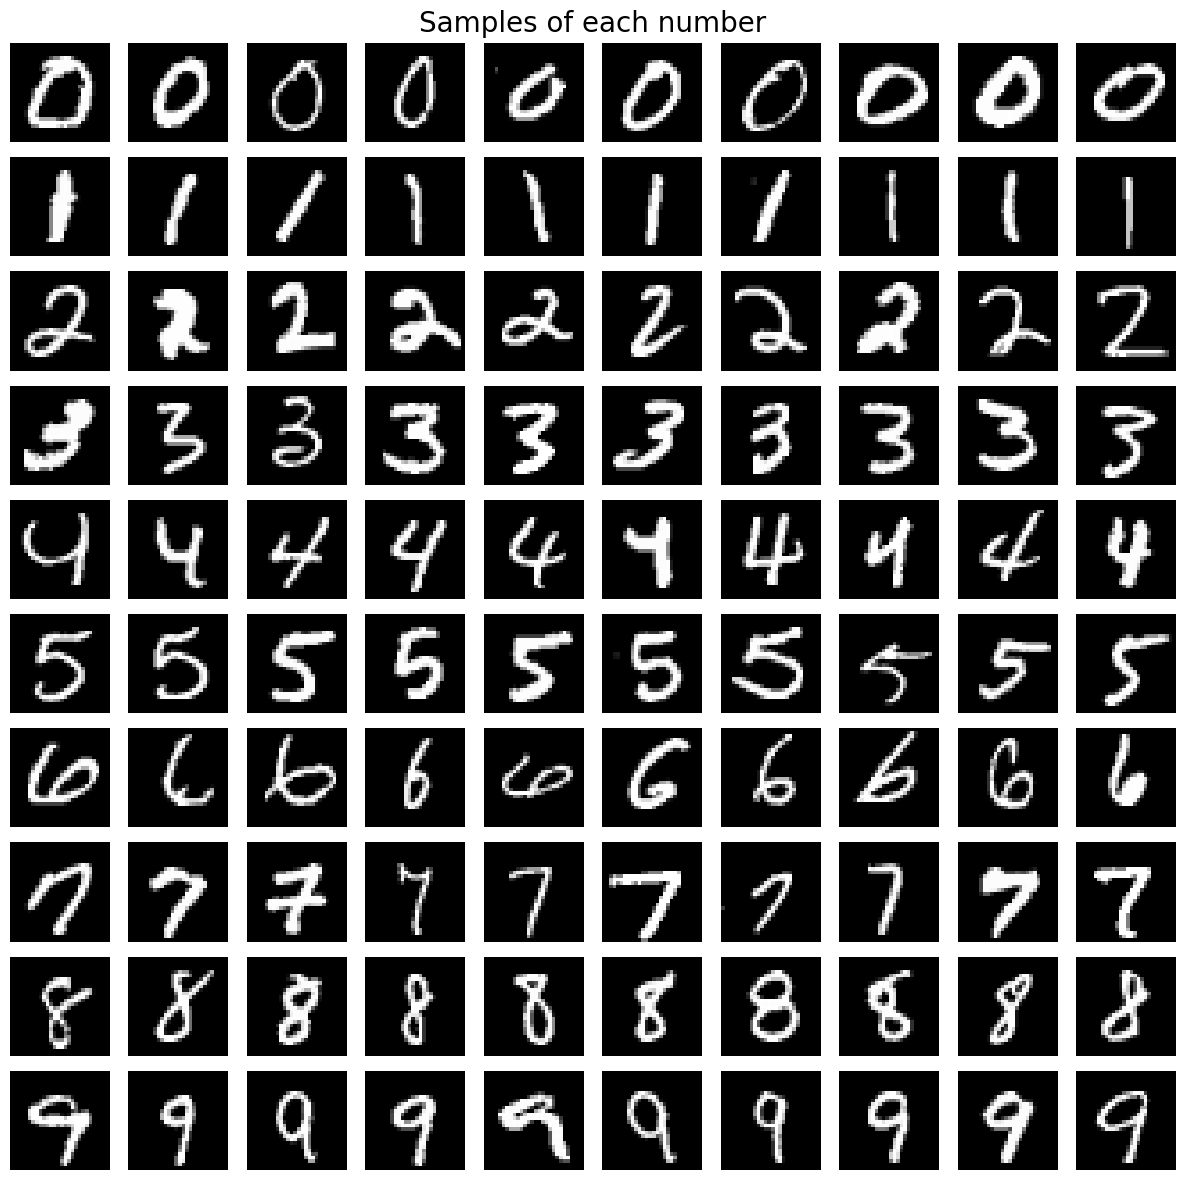

In [50]:
# show 10 images for each number
fig,axs = plt.subplots(10,10,figsize=(12, 12))

# create an array of the 10 first indexes for each number
indexes = [np.where(labels==i)[0][:10] for i in range(10)]

# reshape indexes to a 1D array
indexes = np.array(indexes).reshape(-1)

print(f'indexes: {indexes}')
print(f'labels: {labels[indexes]}')


for i, ax in enumerate(axs.flatten()):

    index = indexes[i]
    # create the image (must be reshaped!)
    img = np.reshape(data[index,:],(28,28))
    ax.imshow(img,cmap='gray')
    
    # remove axes
    ax.axis('off')


plt.suptitle('Samples of each number',fontsize=20)
plt.tight_layout()
plt.show()

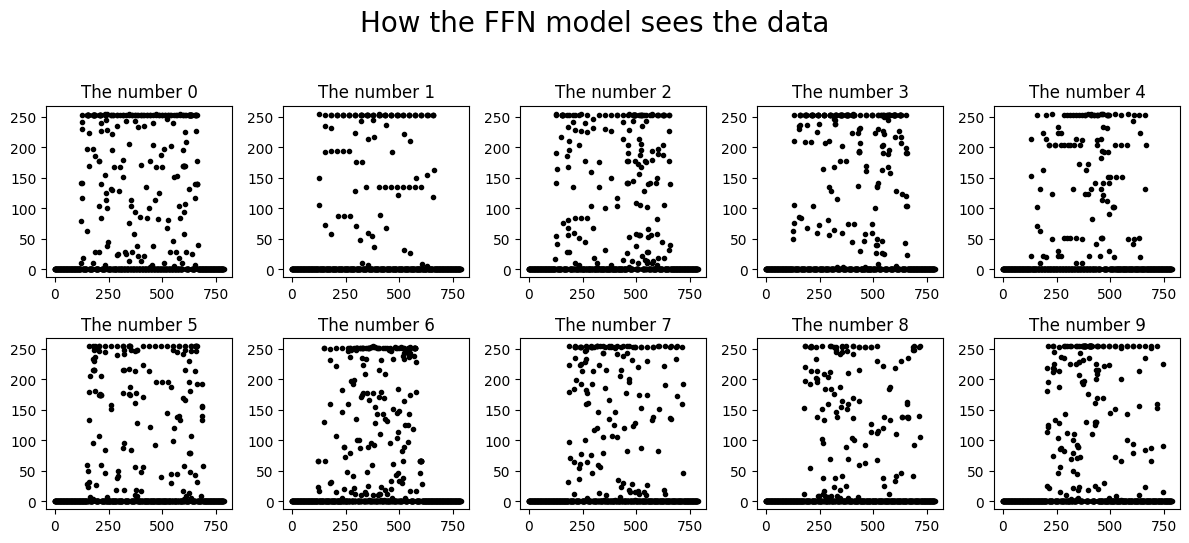

In [51]:
# show one representative of each number
fig,axs = plt.subplots(2,5,figsize=(12,5.5))

for i, ax in enumerate(axs.flatten()):
  # pick the first image with label i
  randimg2show = np.where(labels==i)[0][0]

  # create the image
  ax.plot(data[randimg2show,:],'k.')

  # title
  ax.set_title('The number %i'%labels[randimg2show])

plt.suptitle('How the FFN model sees the data',fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

In [53]:
# let's see some example 7s

# find indices of all the 7's in the dataset
found = np.where(labels==7)
the7s = found[0]
print(found)
print(the7s)

(array([    2,    11,    12, ..., 19937, 19948, 19969], dtype=int64),)
[    2    11    12 ... 19937 19948 19969]


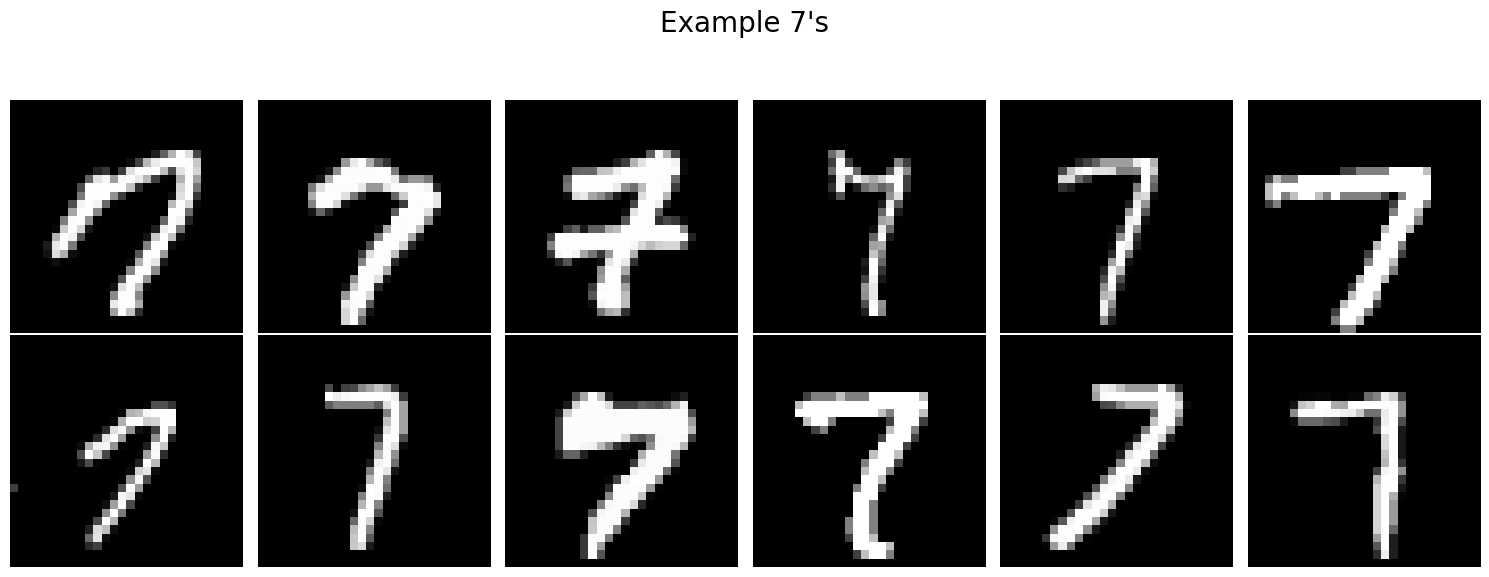

In [54]:
# draw the first 12
fig,axs = plt.subplots(2,6,figsize=(15,6))

for i,ax in enumerate(axs.flatten()):
  img = np.reshape(data[the7s[i],:],(28,28))
  ax.imshow(img,cmap='gray')
  ax.axis('off')

plt.suptitle("Example 7's",fontsize=20)
plt.tight_layout(rect=[0,0,1,.95])
plt.show()

(2126, 784)


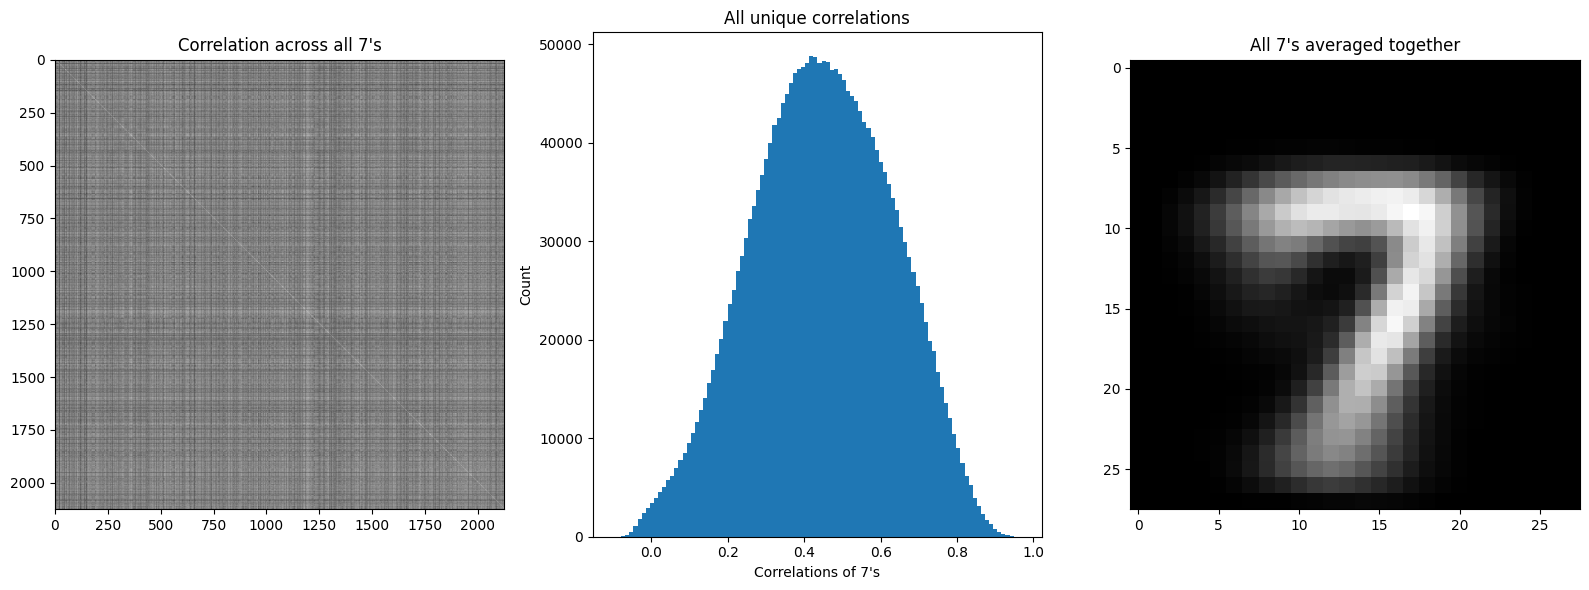

In [70]:
# how similar are all the 7's? 

# how many 7's are there?
print(data[the7s,:].shape)

# let's see how they relate to each other by computing spatial correlations
C = np.corrcoef(data[the7s,:])

# and visualize
fig,ax = plt.subplots(1,3,figsize=(16,6))
ax[0].imshow(C, cmap='gray')
ax[0].set_title("Correlation across all 7's")

# extract the unique correlations and show as a scatterplot
uniqueCs = np.triu(C,k=1).flatten()
ax[1].hist(uniqueCs[uniqueCs!=0],bins=100)
ax[1].set_title('All unique correlations')
ax[1].set_xlabel("Correlations of 7's")
ax[1].set_ylabel('Count')

# show all 7's together
aveAll7s = np.reshape( np.mean(data[the7s,:],axis=0) ,(28,28))
ax[2].imshow(aveAll7s,cmap='gray')
ax[2].set_title("All 7's averaged together")

plt.tight_layout()
plt.show()